In [1]:
# import reqquired libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



In [2]:
# load file
df = pd.read_excel(r'D:\Superstore.xlsx')

In [3]:
df.sample(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment Section,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6068,4857,ES-2015-4093113,2015-11-27,2015-11-30,First Class,HM-14860,Harry Marie,Corporate,Florence,Tuscany,Italy,South,TEC-MA-10002771,Office Supplies,Machines,"StarTech Inkjet, White",538.056,3,0.4,35.856
1627,4514,ES-2017-4099908,2017-12-23,2017-12-28,Standard Class,JH-15910,Jonathan Howell,Consumer,Talence,Aquitaine-Limousin-Poitou-Charentes,France,Central,TEC-AC-10002901,Office Supplies,Accessories,"Memorex Mouse, Bluetooth",225.360,8,0.0,8.880
1012,173,ES-2016-5284545,2016-05-30,2016-06-03,Standard Class,AB-10150,Aimee Bixby,Consumer,San Fernando,Andalusía,Spain,South,TEC-MA-10001139,Furniture,Machines,"Okidata Receipt Printer, Wireless",442.476,4,0.1,83.556


# Perorm EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Row ID           10000 non-null  int64         
 1   Order ID         10000 non-null  object        
 2   Order Date       10000 non-null  datetime64[ns]
 3   Ship Date        10000 non-null  datetime64[ns]
 4   Ship Mode        10000 non-null  object        
 5   Customer ID      10000 non-null  object        
 6   Customer Name    10000 non-null  object        
 7   Segment Section  10000 non-null  object        
 8   City             10000 non-null  object        
 9   State            10000 non-null  object        
 10  Country          10000 non-null  object        
 11  Region           10000 non-null  object        
 12  Product ID       10000 non-null  object        
 13  Category         10000 non-null  object        
 14  Sub-Category     9999 non-null   object

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()


np.int64(0)

In [7]:
df.isna().sum()

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment Section    0
City               0
State              0
Country            0
Region             0
Product ID         0
Category           0
Sub-Category       1
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [8]:
mode_value = df['Sub-Category'].mode()
print(mode_value)

0    Art
Name: Sub-Category, dtype: object


In [9]:
df['Sub-Category'].fillna('Art',inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13136\4118043401.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sub-Category'].fillna('Art',inplace=True)


In [10]:
df.isna().sum()

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment Section    0
City               0
State              0
Country            0
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

# Univariant Analysis

In [11]:
df.drop('Row ID',axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order ID         10000 non-null  object        
 1   Order Date       10000 non-null  datetime64[ns]
 2   Ship Date        10000 non-null  datetime64[ns]
 3   Ship Mode        10000 non-null  object        
 4   Customer ID      10000 non-null  object        
 5   Customer Name    10000 non-null  object        
 6   Segment Section  10000 non-null  object        
 7   City             10000 non-null  object        
 8   State            10000 non-null  object        
 9   Country          10000 non-null  object        
 10  Region           10000 non-null  object        
 11  Product ID       10000 non-null  object        
 12  Category         10000 non-null  object        
 13  Sub-Category     10000 non-null  object        
 14  Product Name     10000 non-null  object

In [13]:
df['Category'].value_counts()

Category
Office Supplies    6589
Technology         1910
Furniture          1501
Name: count, dtype: int64

In [14]:
df['Ship Mode'].value_counts()
#for check proportion of ship mode of sale use pie chrt
x=df['Ship Mode'].value_counts().index
print("x = ",x)
y=df['Ship Mode'].value_counts().values
print("y = ",y)


x =  Index(['Standard Class', 'Second Class', 'First Class', 'Same Day'], dtype='object', name='Ship Mode')
y =  [6054 1976 1454  516]


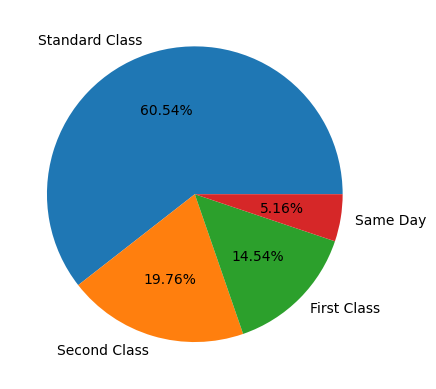

In [15]:
plt.figure()
plt.pie(y,labels=x,autopct="%0.2f%%")
plt.show()

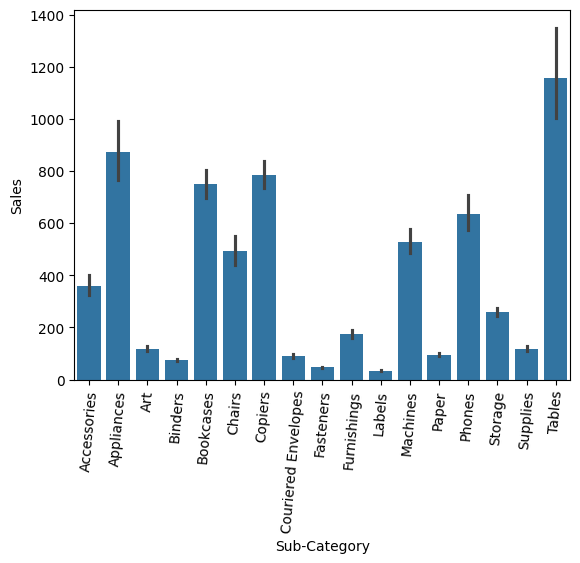

In [16]:
sns.barplot(x=df['Sub-Category'],y=df['Sales'],data=df)
plt.xticks(rotation=85)
plt.show()

# Bivariant Analysis

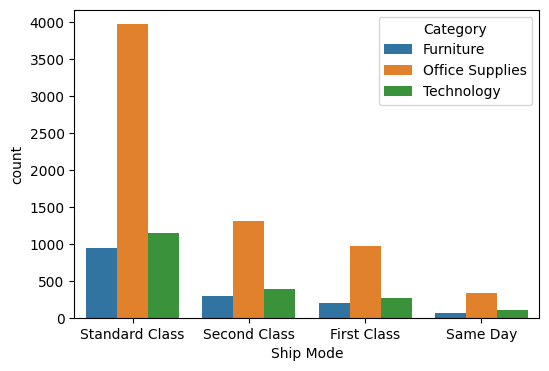

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['Ship Mode'],data=df,hue=df['Category'])
plt.show()

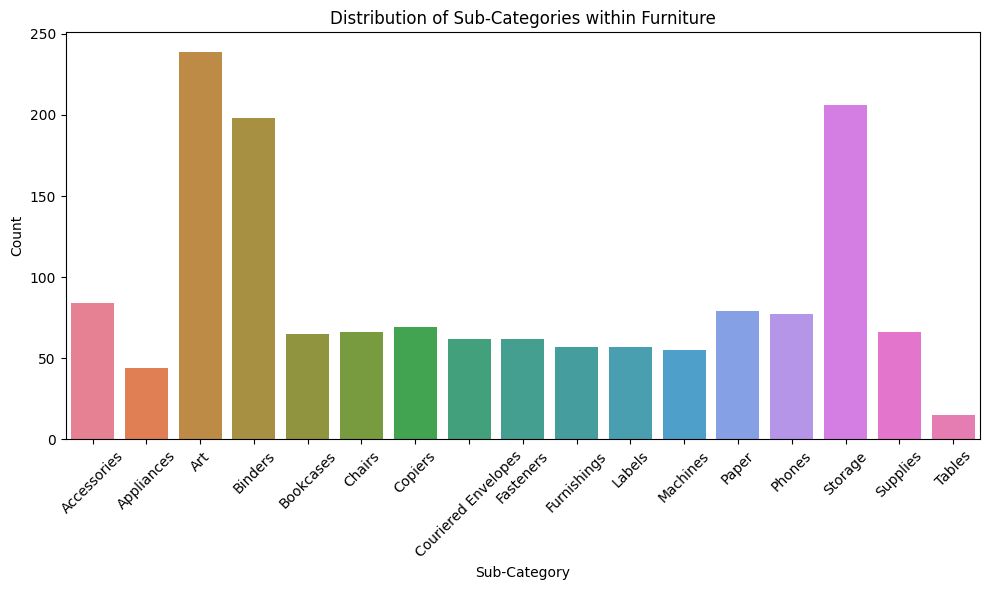

In [18]:
plt.figure(figsize=(10, 6)) 
sns.countplot(x='Sub-Category', data=df[df['Category'] == 'Furniture'], hue='Sub-Category')
plt.title('Distribution of Sub-Categories within Furniture') 
plt.xlabel('Sub-Category')  
plt.ylabel('Count') 
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

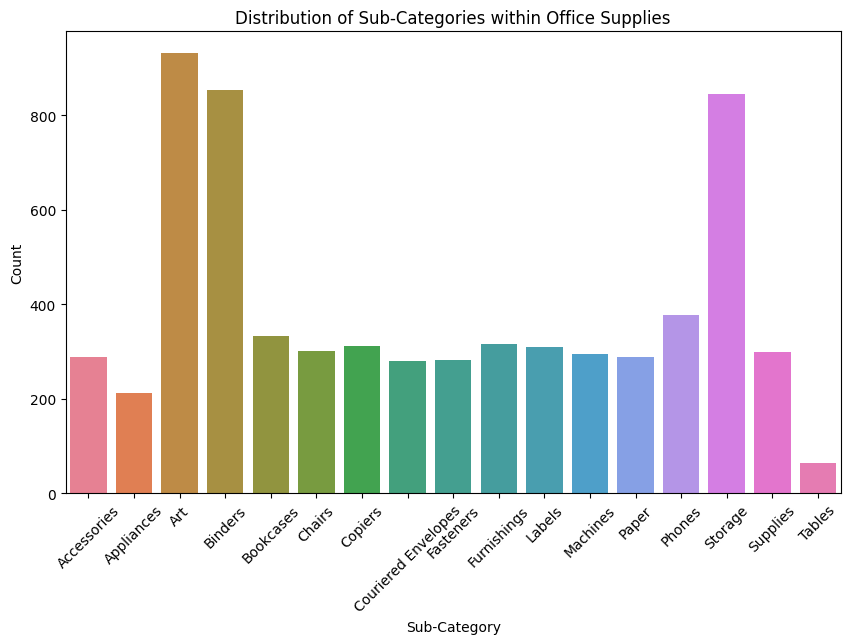

In [19]:
plt.figure(figsize=(10, 6))  
sns.countplot(x='Sub-Category', data=df[df['Category'] == 'Office Supplies'], hue='Sub-Category')
plt.title('Distribution of Sub-Categories within Office Supplies') 
plt.xlabel('Sub-Category')
plt.ylabel('Count') 
plt.xticks(rotation=45) 
plt.show()

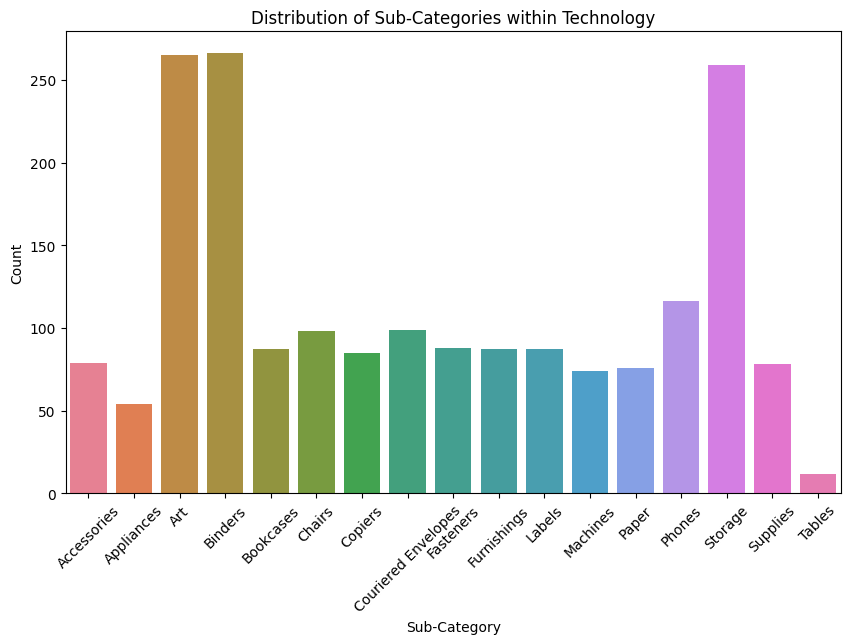

In [20]:

plt.figure(figsize=(10, 6)) 
sns.countplot(x='Sub-Category', data=df[df['Category'] == 'Technology'], hue='Sub-Category')
plt.title('Distribution of Sub-Categories within Technology')
plt.xlabel('Sub-Category') 
plt.ylabel('Count')  
plt.xticks(rotation=45)  
plt.show()

# Feature Engineering

1. renamimg existance column name
X

In [21]:
df = df.rename(columns={"Segment Section":"Customer Segment"})
df.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Customer Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004144,Furniture,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0,0.0


2. i want

In [22]:
df['Order Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Order Date
Non-Null Count  Dtype         
--------------  -----         
10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.3 KB


In [23]:
df['order year']=df['Order Date'].dt.year

In [24]:
df['order year'].value_counts()

order year
2018    3528
2017    2577
2016    2242
2015    1653
Name: count, dtype: int64

<Axes: xlabel='order year', ylabel='count'>

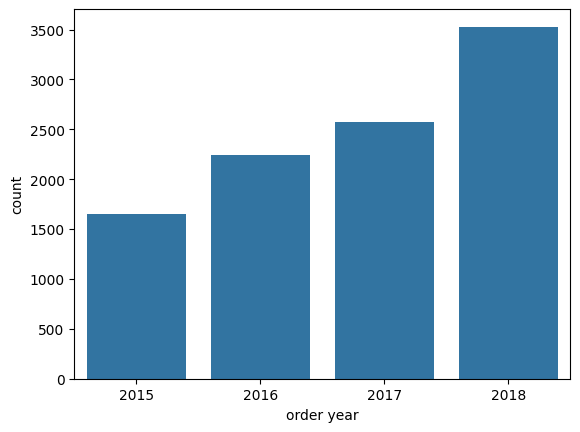

In [25]:
sns.countplot(x=df['order year'],data=df)

* here i am splitting data into dependent(y) and independent(X)

In [26]:
# X=df.drop("Profit",axis=1)
# y=df["Profit"]
X=df.iloc[:,:-2]
y=df.iloc[:,-2]



In [27]:
X.shape

(10000, 18)

In [28]:
y.shape

(10000,)

# Skewness

1. plotting distplot for finding skewness

In [29]:
num_of_columns = X.select_dtypes(include=['int64','float64']).columns
print(num_of_columns)

Index(['Sales', 'Quantity', 'Discount'], dtype='object')


C:\Users\HP\AppData\Local\Temp\ipykernel_13136\2116403889.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[x])


Skewness is
4.712455089581117
Mean is
294.21100615
Mode is
0    27.96
Name: Sales, dtype: float64
Median is
119.355


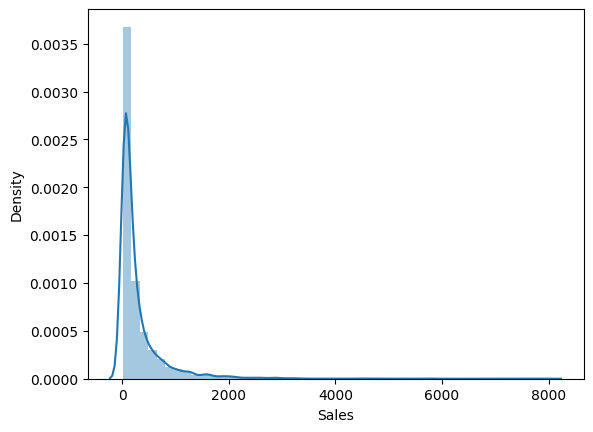

C:\Users\HP\AppData\Local\Temp\ipykernel_13136\2116403889.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[x])


Skewness is
1.2874830334282623
Mean is
3.7773
Mode is
0    2
Name: Quantity, dtype: int64
Median is
3.0


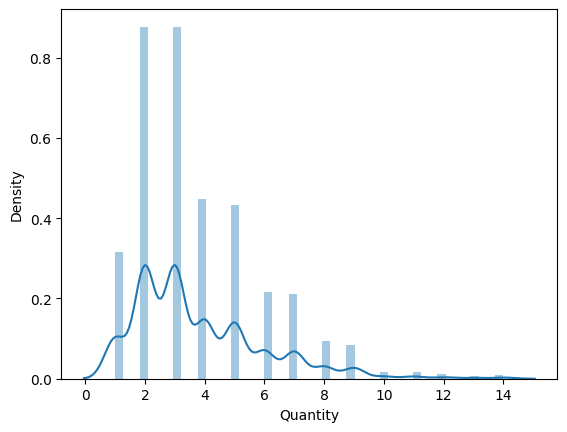

C:\Users\HP\AppData\Local\Temp\ipykernel_13136\2116403889.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[x])


Skewness is
1.6811920766138648
Mean is
0.103105
Mode is
0    0.0
Name: Discount, dtype: float64
Median is
0.0


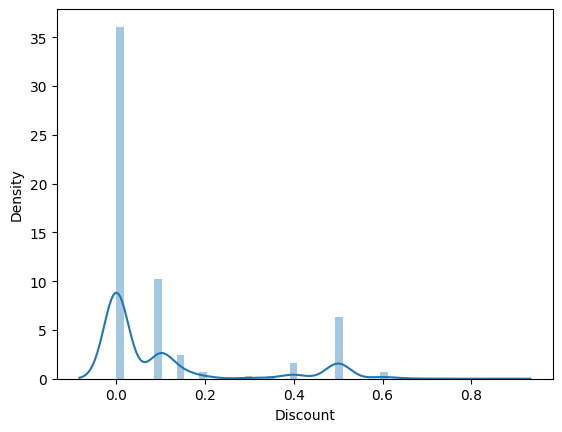

In [30]:
  
for x in X[num_of_columns]:
    sns.distplot(X[x])
    print("Skewness is")
    print(skew(X[x]))
    print("Mean is")
    print(X[x].mean())
    print("Mode is")
    print(X[x].mode())
    print("Median is")
    print(X[x].median())
    plt.show()


* remove skewness
    1. required to check relaton between each independent/ feature to target variable

In [31]:
pd.concat([X[num_of_columns],y],axis=1).corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.343016,-0.017245,0.477111
Quantity,0.343016,1.000000,0.000939,0.111326
Discount,-0.017245,0.000939,1.000000,-0.339153
Profit,0.477111,0.111326,-0.339153,1.000000


In [32]:
X['Quantity']=np.log(X['Quantity'])
skew(X['Quantity'])

np.float64(-0.14301513947962044)

* Find Outliers

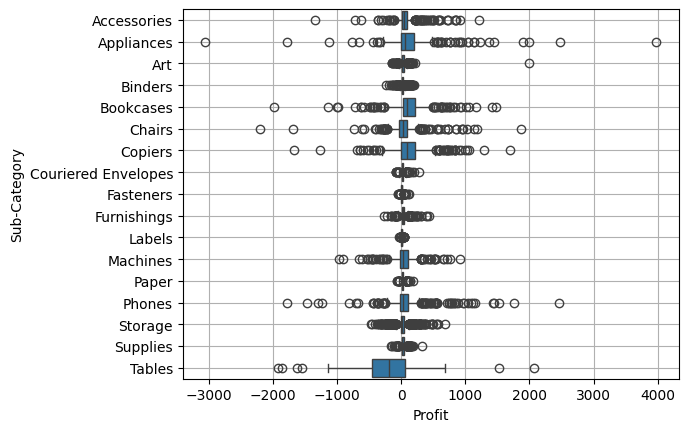

In [33]:
sns.boxplot(data=X,x=y,y='Sub-Category')
plt.grid()
plt.show()

In [ ]:

def remove_outliers_iqr(df, column_name, multiplier=1.5):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_filtered

In [ ]:
# Remove outliers using IQR
df_iqr_removed = remove_outliers_iqr(df.copy(), 'Sub-Category')
print("DataFrame after IQR outlier removal:\n", df_iqr_removed)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

# Handle categorical data 

In [36]:
encoder = LabelEncoder()
for i in df:
    df[i]=encoder.fit_transform(df[i])
df.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Customer Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order year
0,2507,953,1046,3,51,2,1,538,41,14,1,1544,0,0,1550,4823,6,0,1888,3


In [52]:
# Remove outliers using IQR
df_iqr_removed = remove_outliers_iqr(df, 'Sub-Category')
print("DataFrame after IQR outlier removal:\n", df_iqr_removed)

DataFrame after IQR outlier removal:
       Order ID  Order Date  Ship Date  Ship Mode  Customer ID  Customer Name  \
0         2507         953       1046          3           51              2   
1         2507         953       1046          3           51              2   
2         2101         639        705          3          421            435   
3         4413        1028       1126          2          450            435   
4         3182        1149       1254          3           63             49   
...        ...         ...        ...        ...          ...            ...   
9995      2060         748        823          3          143            167   
9996      3674         274        300          3          670            672   
9997      4143         608        672          3           24             44   
9998      4175         656        722          3          452            458   
9999      2972        1076       1178          3          578            559   

 

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Order ID          10000 non-null  int64
 1   Order Date        10000 non-null  int64
 2   Ship Date         10000 non-null  int64
 3   Ship Mode         10000 non-null  int64
 4   Customer ID       10000 non-null  int64
 5   Customer Name     10000 non-null  int64
 6   Customer Segment  10000 non-null  int64
 7   City              10000 non-null  int64
 8   State             10000 non-null  int64
 9   Country           10000 non-null  int64
 10  Region            10000 non-null  int64
 11  Product ID        10000 non-null  int64
 12  Category          10000 non-null  int64
 13  Sub-Category      10000 non-null  int64
 14  Product Name      10000 non-null  int64
 15  Sales             10000 non-null  int64
 16  Quantity          10000 non-null  int64
 17  Discount          10000 non-null

In [38]:
X=df.iloc[:,:-2]
y=df.iloc[:,-2]

# spliting data into trainig and testing 

In [39]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [40]:
x_train.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Customer Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount
2228,3931,591,653,3,295,301,1,637,68,7,2,601,1,2,1564,3724,3,0


In [41]:
y_train.head(1)

2228    1888
Name: Profit, dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Order ID          10000 non-null  int64
 1   Order Date        10000 non-null  int64
 2   Ship Date         10000 non-null  int64
 3   Ship Mode         10000 non-null  int64
 4   Customer ID       10000 non-null  int64
 5   Customer Name     10000 non-null  int64
 6   Customer Segment  10000 non-null  int64
 7   City              10000 non-null  int64
 8   State             10000 non-null  int64
 9   Country           10000 non-null  int64
 10  Region            10000 non-null  int64
 11  Product ID        10000 non-null  int64
 12  Category          10000 non-null  int64
 13  Sub-Category      10000 non-null  int64
 14  Product Name      10000 non-null  int64
 15  Sales             10000 non-null  int64
 16  Quantity          10000 non-null  int64
 17  Discount          10000 non-null

* use linear regression 

In [44]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [45]:
linear=LinearRegression()
linear.fit(x_train,y_train)


LinearRegression()

In [50]:
linear_ypred = linear.predict(x_test)
print(linear_ypred)
print(f"linear  Regression Accuracy: {accuracy_score(y_test, linear_ypred)}")

[2492.21292981 1723.89900872 2973.96392765 ... 2679.02245164 2347.80023399
 3406.91399685]


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [47]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # Adjust n_estimators as needed
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest Regression - MSE: {rf_mse}, R2: {rf_r2}")

Random Forest Regression - MSE: 609335.3210685666, R2: 0.6693663749417171


In [48]:
# Gradient Boosting Regression (XGBoost example)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42) # Adjust n_estimators as needed
gb_model.fit(x_train, y_train)
gb_predictions = gb_model.predict(x_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
print(f"Gradient Boosting Regression - MSE: {gb_mse}, R2: {gb_r2}")

Gradient Boosting Regression - MSE: 588381.6087630971, R2: 0.6807361439645212


In [ ]:
# Logistic Regression
logreg = LogisticRegression() #increase max_iter if it fails to converge.
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, logreg_pred)}")

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.0016666666666666668


In [53]:
# Support Vector Classifier (SVC)
svc = SVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
print(f"SVC Accuracy: {accuracy_score(y_test, svc_pred)}")

SVC Accuracy: 0.019333333333333334


In [54]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, dt_pred)}")

Decision Tree Accuracy: 0.116
